# Handwritten Digit Recognition using Support Vector Machines

Classify images of Handwritten digits present as pixel values in MNIST Dataset, SVM classifier is trained against data stored in train.csv file and test against data present in test.csv.

### Importing dependencies

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline

### Split the testing dataset into train and test data

Data is split into a ratio of 80:20 training:testing data

In [28]:
dataset=pd.read_csv('train.csv')
images=dataset.iloc[:, 1:]
labels=dataset.iloc[:, :1]
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size=0.8, test_size=0.2, random_state=0)

### Plotting each column data as a pixel in the image

Text(0.5,1,'label    8\nName: 40004, dtype: int64')

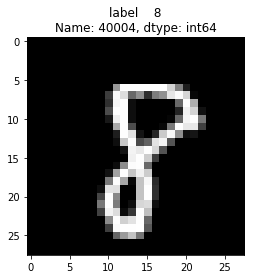

In [29]:
img=train_images.iloc[10].values.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title(train_labels.iloc[10])

### Increase the intensity of whiteness on blurred pixels

In [30]:
train_images.iloc[train_images>0]=1
test_images.iloc[test_images>0]=1

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'label    8\nName: 40004, dtype: int64')

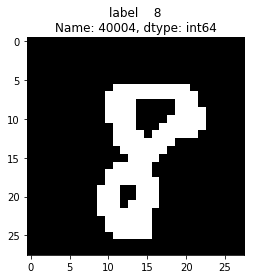

In [31]:
img=train_images.iloc[10].values.reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title(train_labels.iloc[10])

### Feeding the training data into Support Vector Classifier

In [32]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.9428571428571428

### Check the results on testing data

In [33]:
testing_data=pd.read_csv('test.csv')
testing_data[testing_data>0]=1
results = clf.predict(testing_data)

In [34]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [35]:
df = pd.DataFrame(results)
df.index += 1
df.index.name = "Image Id"
df.columns = ["Prediction"]
df

,Prediction
Image Id,
1,2
2,0
3,9
4,9
5,3
6,7
7,0
8,3
9,0
